# 01. 빈도 기반 EDA - 히트맵 시각화

## 목적
커뮤니티별 언어 사용 패턴을 히트맵으로 시각화하여 차이를 한눈에 파악합니다.

## 분석 항목
1. 종결 어미 Top 30 히트맵
2. 문형 비율 히트맵
3. 기호 패턴 히트맵

In [1]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter
from pathlib import Path

# 한글 폰트 설정
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 결과 저장 디렉토리
results_dir = Path('../data/results')
results_dir.mkdir(parents=True, exist_ok=True)

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
# 프로젝트 루트를 Python 경로에 추가
import sys
from pathlib import Path
project_root = Path('..').resolve()
sys.path.insert(0, str(project_root))

from scripts.analysis.analyze import load_and_balance_data

# 데이터 로드 및 밸런싱
expanded_dir = Path('../data/processed/expanded')
df = load_and_balance_data(expanded_dir)

# 데이터 로드
# JSON 파싱
print(f"Total posts: {len(df)}")
print(f"Communities: {df['community'].unique()}")


발견된 파일: 8개
  - expanded_dcinside_향수화장품_갤러리.csv: 17381행
  - expanded_dcinside_수능_갤러리.csv: 9327행
  - expanded_dcinside_해외축구_갤러리.csv: 5700행
  - expanded_dcinside_국내연예-남자여자연예인_갤러리.csv: 14430행
  - expanded_dcinside_남자연예인_갤러리.csv: 6844행
  - expanded_theqoo_beauty_category_25604.csv: 17199행
  - expanded_dcinside_리그오브레전드_갤러리.csv: 9075행
  - expanded_theqoo_ktalk_category_1947874.csv: 11361행

⚖️ 밸런싱 기준: 최소 5700행 (랜덤 샘플링)
✅ 병합 완료: 총 45600행 (커뮤니티당 5700행)
데이터 파싱 중 (종결 어미, 기호)...
Total posts: 45600
Communities: ['dcinside_향수화장품_갤러리' 'dcinside_수능_갤러리' 'dcinside_해외축구_갤러리'
 'dcinside_국내연예-남자여자연예인_갤러리' 'dcinside_남자연예인_갤러리'
 'theqoo_beauty/category/25604' 'dcinside_리그오브레전드_갤러리'
 'theqoo_ktalk/category/1947874']


In [4]:
df

,community,full_text,timestamp,sentence,all_endings,intent,punctuation,symbols,min_prob,last_token_prob,has_oov,needs_manual_intent
0,dcinside_향수화장품_갤러리,트레티노인 디페린 아크리프는 레티놀 레티날이랑 병행하면 좋지 트레티노인 디페린 아크리프를 매일 바르는건 븅신짓이다. 뭐 피부가 강철중에 강철이면 몰라도 그것보단 저렇게 강력한녀석은 일주일에 두번 정도만 바르고 나머지날은 레티놀이나 레티날 바르면 됨 그럼 피부 자극도 덜하고 효과도 더 좋음 피부가 강철이면 매일 발라도 좋겠지만 저건 그렇게 컨트롤할 아이가 아니여 나같은 경우에는 싸이클링으로 돌리는데 첫날 아크리프 - 둘째날 레티날 1000 셋째날(레티놀 팔리메이트 가장약함) 그후 넷째날 아크리프 이런씩으로 일주일에 2회정도 돌림 그러니까 피부 자극도 없고 흑화도 없고 부작용도 없더라 그리고 바디에도 발라라 바디는 피부 아니냐 얼굴에만 처발 하지말고 바디도 좀 신경 쓰자,2025-09-22T01:05:06,피부가 강철이면 매일 발라도 좋겠지만 저건 그렇게 컨트롤할 아이가 아니여,"[[여, EF, 0.7577353715896606, 0]]",NaN,[],[],0.000000,0.757735,True,True
1,dcinside_향수화장품_갤러리,턱쪽에만 모낭염 생기는데 진짜 개좆같네.. 모낭염인지 여드름인지 구분안가긴함 어릴땐 볼이랑 관자에 ㅈㄴ나더니 이젠 위쪽에는 이제 절대 안생기는데 하관 턱라인에만 ㅈㄴ남 밤에 누우면 턱쪽만 ㅈㄴ간지러운데 여드름균 이런건가 클렌징 이후에 올라오는거보면 자극받는거같긴한데 걍 썬크림 바르지말고 물세안할까 시발 썬크림바르면 클렌징폼 무조건 써야되는데 답이없네그냥,2025-10-16T21:38:25,클렌징 이후에 올라오는거보면 자극받는거같긴한데 걍 썬크림 바르지말고 물세안할까,"[[(으)ㄹ까, EF, 0.8749715089797974, 0]]",NaN,[],[],0.000000,0.874972,True,True
2,dcinside_향수화장품_갤러리,더마팩토리 추천받고 오늘써본후기 = 굳임 장벽크림 - 시발 이거 배송됐다면서 없어서 문의넣고 대기중 어성초 폼클 (약알칼리) - 괜찮음 수분크림 - 되게 괜찮은듯 클렌징워터로 썬크림 지우고 폼클쓰고 카밍듀 앰플 듬뿍 바르고 수분클림 살짝 발랐는데 괜찮은듯 장벽크림이 피부거칠어지고 뒤집어진데에 효과가 좋다해서 써보고싶었는데 시발꺼 안왔네ㅋㅋㅋ 얼른 써보고싶다,2025-10-23T21:00:02,장벽크림 - 시발 이거 배송됐다면서 없어서 문의넣고 대기중 어성초 폼클 (약알칼리) - 괜찮음,"[[(으)ㅁ, EF, 0.981621265411377, 0]]",NaN,[],[],0.000000,0.981621,True,True
3,dcinside_향수화장품_갤러리,살리실산 바하 제품 쓰는게 피지 쌓이는것도 막음? 각질제거템을 각질제거떄문에 쓰는게 아니라 피지 쌓이는거 막아줌?,2025-09-26T13:54:09,각질제거템을 각질제거떄문에 쓰는게 아니라 피지 쌓이는거 막아줌?,"[[아줌, EF, 0.9156262874603271, 1]]",NaN,[?],[],0.000000,0.980529,True,True
4,dcinside_향수화장품_갤러리,드럽긴한데 ㄲㅊ색소침착 미백은 뭘로해야해? 1년 전 건선 걸리고 나서 좀 심하게 까매져서 답도없어짐 비뇨기과 쌤이 낫고나서 색은 돌아온다했는데 안돌아와서 뭐라도 발라보려고,2025-11-21T16:11:30,하게 까매져서 답도없어짐 비뇨기과 쌤이 낫고나서 색은 돌아온다했는데 안돌아와서 뭐라도 발라보려고,"[[려고, ECF, 0.9255020618438721, 0]]",NaN,[],[],0.486944,0.925502,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
45595,theqoo_ktalk/category/1947874,걍 여자들만 골라서 저러는게 웃긴 포인트 같음 만만하니깐 저러는거잖아,2025-11-23T00:00:00,걍 여자들만 골라서 저러는게 웃긴 포인트 같음,"[[(으)ㅁ, EF, 0.6269664764404297, 0]]",NaN,[],[],0.617995,0.626966,True,True
45596,theqoo_ktalk/category/1947874,남자팬 많은 남돌? 남자가수? 누구지 아일릿보다 남자성비 높다는 댓글 핫게에서 봤었는디,2025-11-23T00:00:00,남자팬 많은 남돌?,[],NaN,[?],[],0.000000,0.986253,True,True
45597,theqoo_ktalk/category/1947874,수습하려는 멤버 착해보이네. 어떻게든 둘에게 타격 안 주려고 바다의 보배 이러고 있고 애교가 어쩌고 하면서 딴 얘기로 넘어감 당황해서 얼어버리는 거 안쓰럽네,2025-11-23T00:00:00,수습하려는 멤버 착해보이네.,"[[네, EF, 0.9833711385726929, 0]]",NaN,[.],[],0.000000,0.993084,True,True
45598,theqoo_ktalk/category/1947874,민이 개저씨라고 욕한 임원들이 정작 민 유혹?에는 안넘어간것도 공수치임 그 임원들도 민하고 그런식으로는 얽히면 안된다는 본능적인 직감같은게 있었는지 아무도 안넘어간게..ㅋㅋ,2025-11-24T11:10:00,그 임원들도 민하고 그런식으로는 얽히면 안된다는 본능적인 직감같은게 있었는지,"[[는지, EF, 0.8512523770332336, 0]]",NaN,[],[],0.000000,0.851252,True,True


## 1. 종결 어미 Top 30 히트맵

In [5]:
# 전체 종결 어미 Top 30 추출
# 어미는 이미 데이터 전처리 단계에서 정규화됨
all_endings_flat = [item[0] for sublist in df['all_endings'] for item in sublist]
ending_counts = Counter(all_endings_flat)
top_30_endings = [e[0] for e in ending_counts.most_common(30)]

print("Top 30 종결 어미:")
print(top_30_endings)

Top 30 종결 어미:
['(으)ㅁ', '다', '긔', '나', '네', '노', '어', '냐', '(으)ㄹ까', '아', 'ㄴ가', '지', '야', 'ㄴ다', '기', 'ㅂ니다', '어/아라', 'ㄴ지', '요', '는데', '잖아', '고', '더라', '어요', 'ㄴ데', '는지', '구나', 'ㄹ지', '은데', '거든']


In [6]:
# 커뮤니티별 종결 어미 빈도표 생성
communities = df['community'].unique()
ending_data = []

for comm in communities:
    comm_df = df[df['community'] == comm]
    comm_endings = [item[0] for sublist in comm_df['all_endings'] for item in sublist]
    comm_counts = Counter(comm_endings)
    
    row = {'Community': comm}
    for ending in top_30_endings:
        row[ending] = comm_counts.get(ending, 0)
    ending_data.append(row)

ending_df = pd.DataFrame(ending_data).set_index('Community')
ending_df

,(으)ㅁ,다,긔,나,네,노,어,냐,(으)ㄹ까,아,...,잖아,고,더라,어요,ㄴ데,는지,구나,ㄹ지,은데,거든
Community,,,,,,,,,,,,,,,,,,,,,
dcinside_향수화장품_갤러리,1588,230,6,443,270,27,130,164,226,87,...,16,53,50,86,26,37,13,28,20,23
dcinside_수능_갤러리,975,549,1,234,228,131,84,388,145,62,...,11,17,45,84,23,34,16,35,24,11
dcinside_해외축구_갤러리,944,308,3,158,453,243,87,288,29,63,...,39,33,26,33,37,16,25,11,15,6
dcinside_국내연예-남자여자연예인_갤러리,445,337,1328,210,88,635,88,54,53,93,...,103,35,21,44,25,43,32,16,4,15
dcinside_남자연예인_갤러리,532,178,901,206,170,693,220,29,47,217,...,94,63,17,22,72,20,35,8,27,3
theqoo_beauty/category/25604,689,267,0,372,164,0,614,19,557,357,...,24,45,52,12,20,50,13,35,18,70
dcinside_리그오브레전드_갤러리,1579,274,0,191,340,168,57,372,59,53,...,61,60,47,19,63,24,25,24,31,9
theqoo_ktalk/category/1947874,1220,323,46,386,240,5,321,81,99,196,...,44,67,100,27,50,45,34,8,19,18


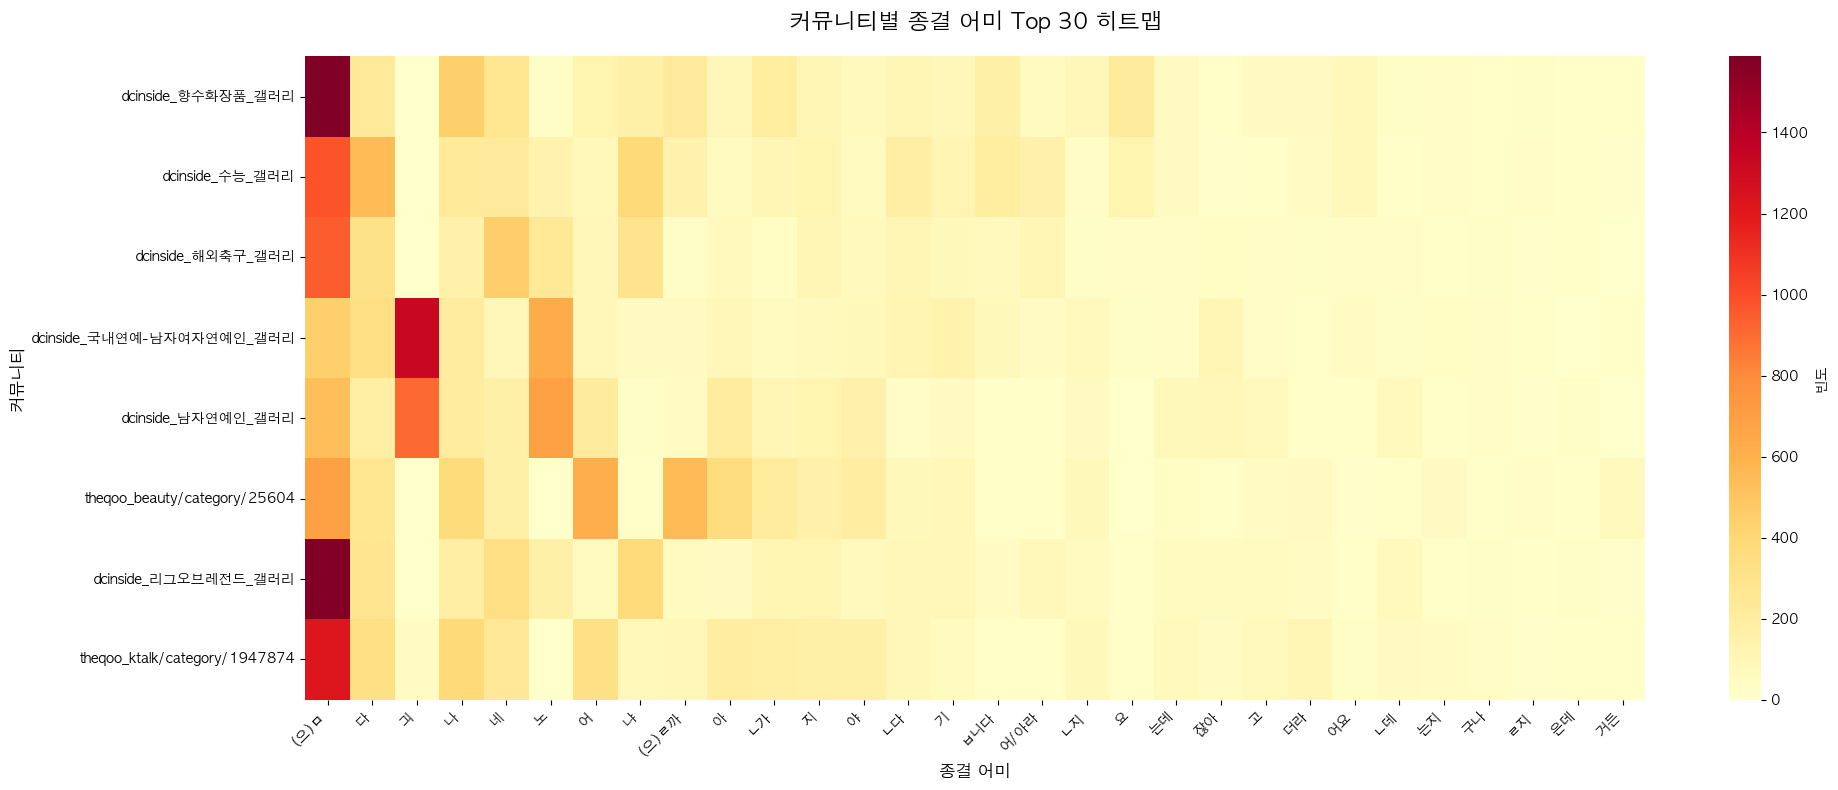

저장: ../data/results/heatmap_endings.png


In [7]:
# 히트맵 시각화
plt.figure(figsize=(20, 8))
sns.heatmap(ending_df, annot=False, cmap='YlOrRd', cbar_kws={'label': '빈도'})
plt.title('커뮤니티별 종결 어미 Top 30 히트맵', fontsize=16, pad=20)
plt.xlabel('종결 어미', fontsize=12)
plt.ylabel('커뮤니티', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(results_dir / 'heatmap_endings.png', dpi=150)
plt.show()

print(f"저장: {results_dir / 'heatmap_endings.png'}")

## 2. 기호 패턴 히트맵

In [8]:
from collections import Counter
all_symbols = [item for sublist in df['symbols'] for item in sublist]
unique_symbols = list(set(all_symbols))
print(unique_symbols)

# 또는 빈도와 함께 보려면:
symbol_counts = Counter(all_symbols)
top_30_symbols = [e[0] for e in symbol_counts.most_common(30)]

print("Top 30 기호:")
print(top_30_symbols)

['ㅋㅏ', 'ㅇㅈㄱ', 'ㅂㄴ', 'ㅈㄴㅈ', 'ㅅㄹㄷ', 'ㄷㅎ', 'ㅂ', 'ㅅㅍㅈ', 'ㅇㄶㄴ', 'ㅇㅇ', 'ㅇㄷ', 'ㅇㄴㄷ', 'ㅅㄷㅁ', 'ㅎㅇㅌ', 'ㅎㅅ', 'ㄴㅇ', 'ㅅㅂㅠ', 'ㅄㅋㅋ', 'ㄴㄷ', 'ㄹㅇㄹ', 'ㅇㅋㅋ', 'ㅇㄻㅇ', 'ㅃㅂ', 'ㅍㅌㅇ', 'ㅠㅜㅜ', 'ㅠㅜ', 'ㅍㅇㅌ', 'ㅋㅌㅊ', 'ㄷㅋㅋ', 'ㅛㅛㅕ', 'ㅈㅐ', 'ㅍ', 'ㅃㄹ', 'ㅅㅂㅋ', 'ㄴㅍㅇ', 'ㅇㅏ', 'ㅌㅋㅌ', 'ㄹㅇ', 'ㅆㅃ', 'ㅁ', 'ㄱㅇㅇ', 'ㅇㄱㅈ', 'ㅈㅇㅈ', 'ㅋㅇㄹ', 'ㅠㅜㅠ', 'ㅈㄴㅄ', 'ㅋㅜ', 'ㄴㅌㄴ', 'ㅉㅇ', 'ㅇㅎㅇ', 'ㄷㅓ', 'ㅅㅅㅎ', 'ㅅㅂㅅ', 'ㅅㅅ', 'ㅎ', 'ㅈㅅㅁ', 'ㅇㄺㅂ', 'ㄸㄴ', 'ㅈㅅ', 'ㄷㅂ', 'ㅑㅜㅜ', 'ㄷㄱㄷ', 'ㅍㅌㅊ', 'ㅂㅂㅌ', 'ㄷㄷ', 'ㅑ', 'ㅣ', 'ㅁㅊㄷ', 'ㅅㄱㅇ', 'ㅅㅍ', 'ㅌㅌㅋ', 'ㅌㅋㅊ', 'ㅎㅇㅂ', 'ㅄ', 'ㅅㅋㅋ', 'ㅈ', 'ㄴㅋㅋ', 'ㅇㅌㅂ', 'ㄱㄱㅎ', 'ㅠㅋㅋ', 'ㅋㅍ', 'ㅈㅉ', 'ㅇㅂㄱ', 'ㅎㄹ', 'ㅁㅈ', 'ㄸㄹㅇ', 'ㅇㅊㄻ', 'ㅇㅁㄴ', 'ㅅㅇ', 'ㄹㅇㅌ', 'ㅋㄲ', 'ㄳㅎ', 'ㅇㅊㅇ', 'ㅎㄹㄹ', 'ㅠㅍ', 'ㄴㅏ', 'ㄴㄱㅁ', 'ㅇㄱㄹ', 'ㅈㅣ', 'ㅆㅅㅌ', 'ㅁㅁㅁ', 'ㅋㅋㄴ', 'ㅜㅠㅠ', 'ㅗㄹ', 'ㄲㅃ', 'ㅆㄱㄴ', 'ㅍㅊㅋ', 'ㅇㄶㄻ', 'ㅇㄴㅁ', 'ㅋㅍㅌ', 'ㅇㄱ', 'ㅑㅏㅏ', 'ㄱㄷㅁ', 'ㄹㄹㅎ', 'ㅍㅊㅌ', 'ㅁㅊㅋ', 'ㄱㄹ', 'ㅎㄱㅇ', 'ㅈㅂㅈ', 'ㅅㄷㅅ', 'ㅁㅌ', 'ㅌㅌ', 'ㄴㅇㅂ', 'ㅆ', 'ㅋㄹㅍ', 'ㅉㅉㅉ', 'ㅓ', 'ㅅㅏ', 'ㄴㅇㄹ', 'ㅇㅁㅇ', 'ㅜㅠ', 'ㄱㅇㄷ', 'ㅋㅍㅋ', 'ㅡㄱ', 'ㄱㄹㅈ', 'ㅇㅈㅇ', 'ㅇㅐ', 'ㄱㅇ', 'ㅋㅋㅠ', 'ㄹㄹㄹ', 'ㄹㅈㄷ', 'ㅣㅣㅣ', 'ㅔㅔ', 'ㄲㅋㅋ', 'ㄱㅊㄱ', 'ㅇㅂㅌ', 'ㅁㅎㅈ', 'ㅂㅌ', 'ㅈㅇ', 'ㅠㅍㅋ', 'ㅇㄹ', 'ㅜㅜㅜ', 'ㅆㅂㅋ

In [9]:
# 커뮤니티별 기호 패턴 빈도
symbol_data = []

for comm in communities:
    comm_df = df[df['community'] == comm]
    comm_symbols = [item for sublist in comm_df['symbols'] for item in sublist]
    symbol_counts = Counter(comm_symbols)
    
    row = {'Community': comm}
    for symbol in top_30_symbols:
        row[symbol] = symbol_counts.get(symbol, 0)
    symbol_data.append(row)

symbol_df = pd.DataFrame(symbol_data).set_index('Community')
symbol_df

,ㅋㅋㅋ,ㅋㅋ,ㄹㅇ,ㅈㄴ,ㅇㅇ,ㅠㅠ,ㅅㅂ,ㅠ,ㅋ,ㅈ,...,ㅆㅅㅌ,ㅜㅜㅜ,ㄹㅇㅋ,ㅌㅊ,ㅅㅂㅋ,ㄱㄱ,ㅂㅅ,ㅇㄴㄷ,ㅡㅡ,ㄱㄴ
Community,,,,,,,,,,,,,,,,,,,,,
dcinside_향수화장품_갤러리,36,43,26,93,49,36,30,28,12,42,...,4,2,0,0,2,12,5,0,1,0
dcinside_수능_갤러리,137,114,42,130,59,19,55,14,24,68,...,2,3,3,2,1,7,11,0,0,38
dcinside_해외축구_갤러리,1238,305,102,47,56,15,48,4,71,34,...,2,5,21,0,12,7,13,0,6,0
dcinside_국내연예-남자여자연예인_갤러리,333,235,119,113,94,5,24,7,53,21,...,18,0,3,29,5,5,5,18,2,0
dcinside_남자연예인_갤러리,146,76,155,75,63,5,44,8,16,4,...,24,0,2,15,7,7,2,24,15,0
theqoo_beauty/category/25604,197,65,28,19,18,216,11,162,12,0,...,0,29,0,0,1,3,0,0,4,0
dcinside_리그오브레전드_갤러리,454,299,188,131,157,16,35,1,40,52,...,3,0,18,0,8,1,4,0,2,0
theqoo_ktalk/category/1947874,408,99,81,93,61,49,69,56,14,7,...,0,12,4,1,10,1,2,0,9,1


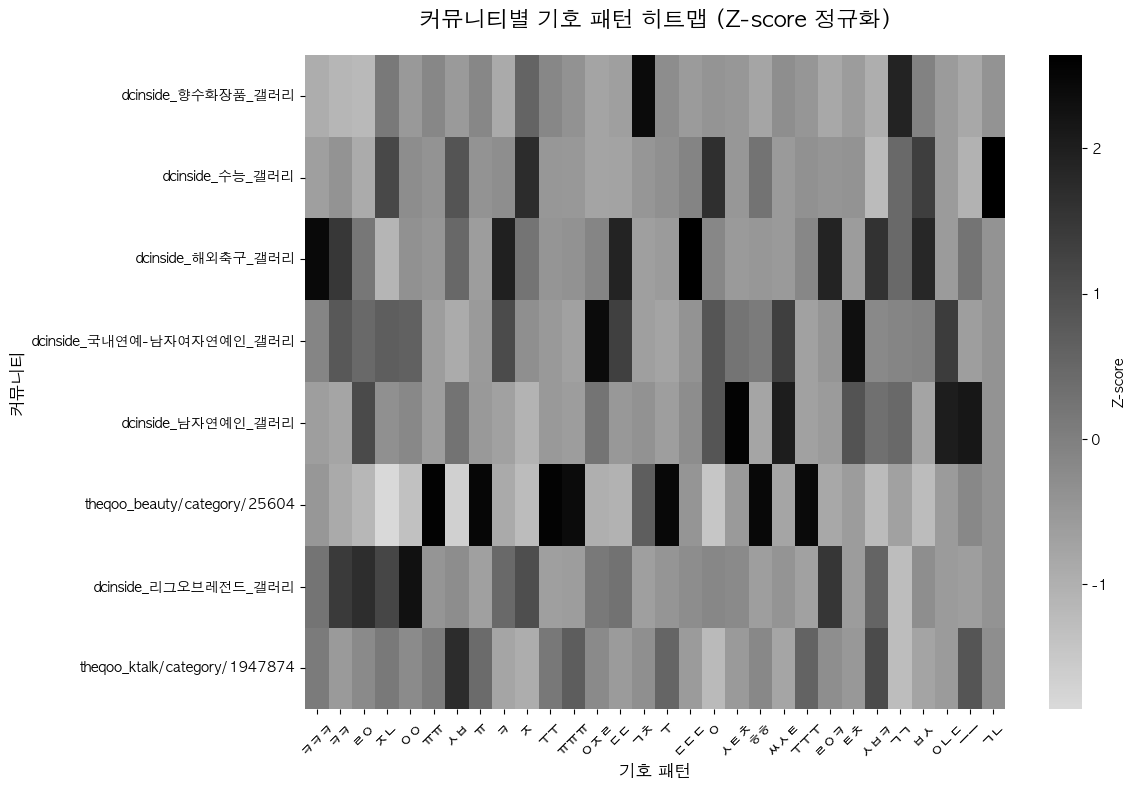

저장: ../data/results/heatmap_symbols.png


In [12]:
# Z-score 정규화 (커뮤니티 간 비교를 위해)
from scipy.stats import zscore

symbol_df_normalized = symbol_df.apply(zscore, axis=0)

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(symbol_df_normalized, annot=False, cmap='grey_r', center=0, 
            cbar_kws={'label': 'Z-score'})
plt.title('커뮤니티별 기호 패턴 히트맵 (Z-score 정규화)', fontsize=16, pad=20)
plt.xlabel('기호 패턴', fontsize=12)
plt.ylabel('커뮤니티', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(results_dir / 'heatmap_symbols.png', dpi=150)
plt.show()

print(f"저장: {results_dir / 'heatmap_symbols.png'}")

## 결론

히트맵 분석을 통해 다음을 확인할 수 있습니다:
1. **종결 어미**: 커뮤니티별로 사용 빈도가 뚜렷하게 다름
2. **기호 패턴**: 'ㅋㅋㅋ', '…' 등의 사용 패턴이 커뮤니티 특성을 반영

이는 각 커뮤니티가 고유한 언어 문화를 가지고 있음을 시사합니다.